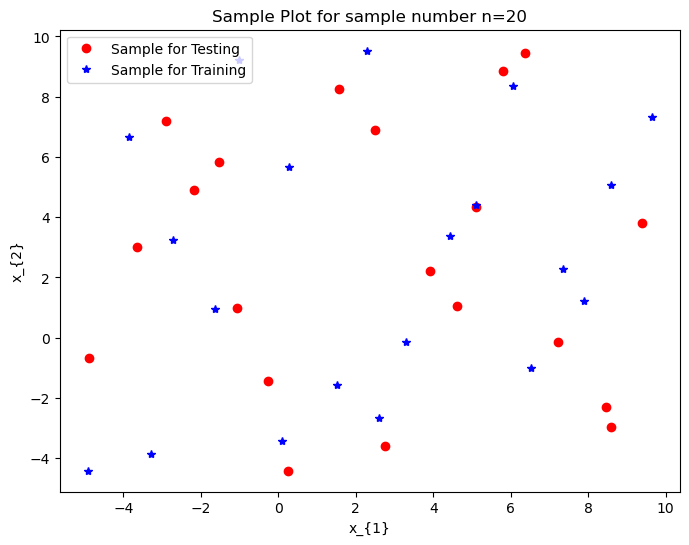

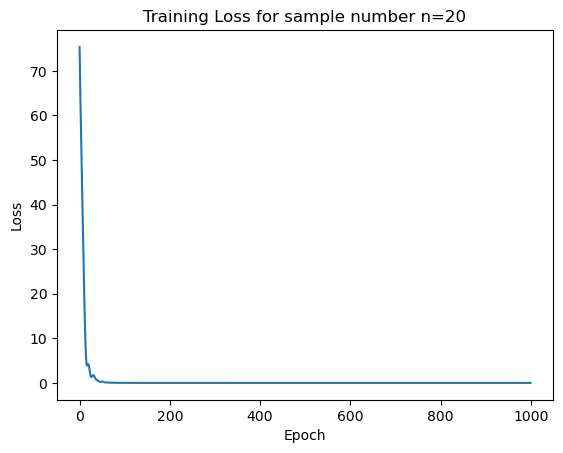

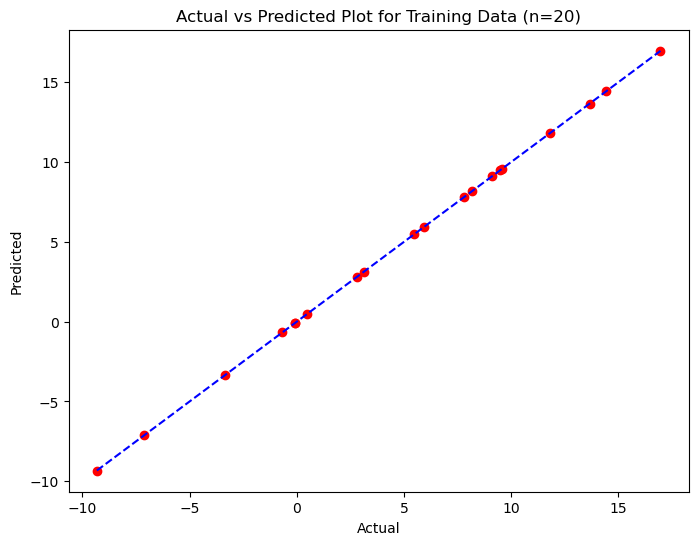

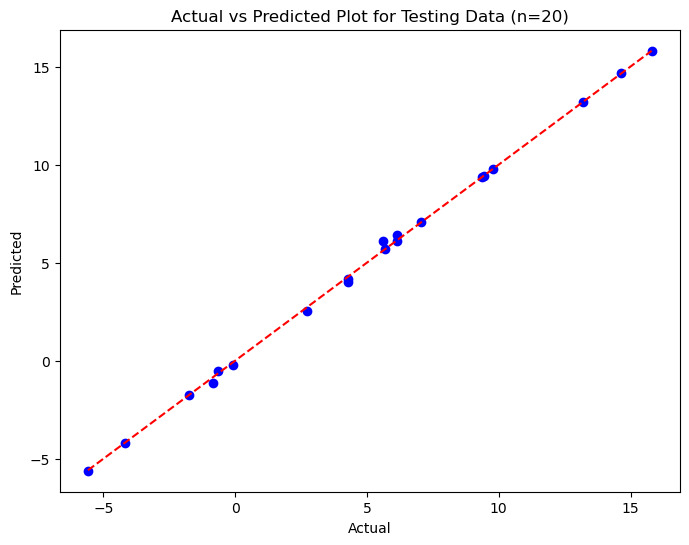

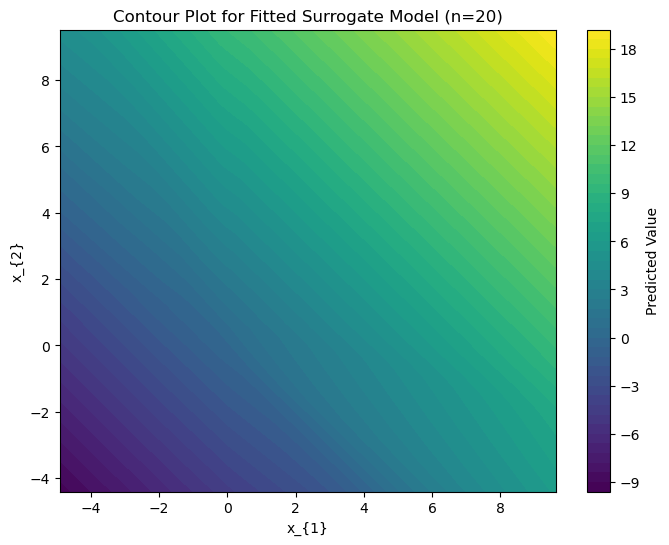

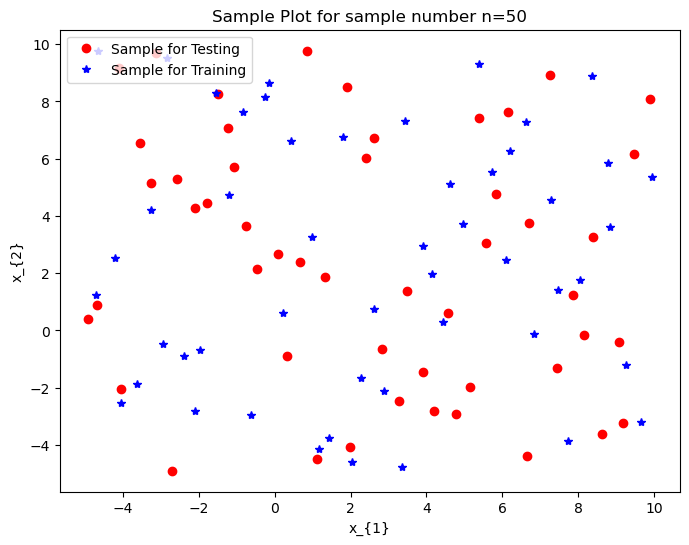

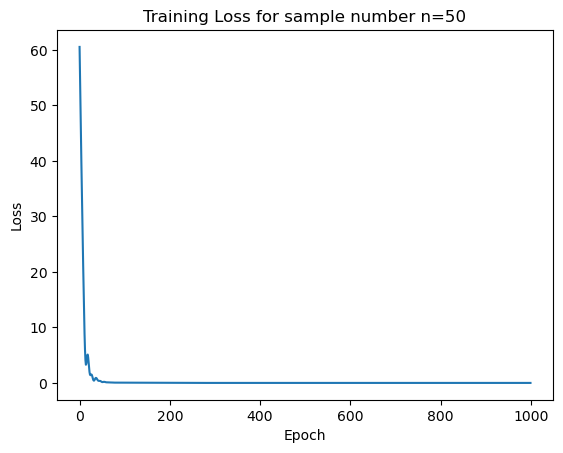

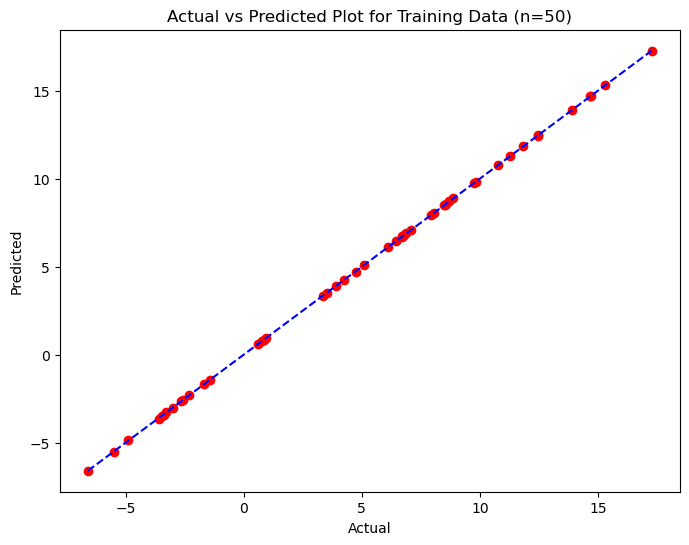

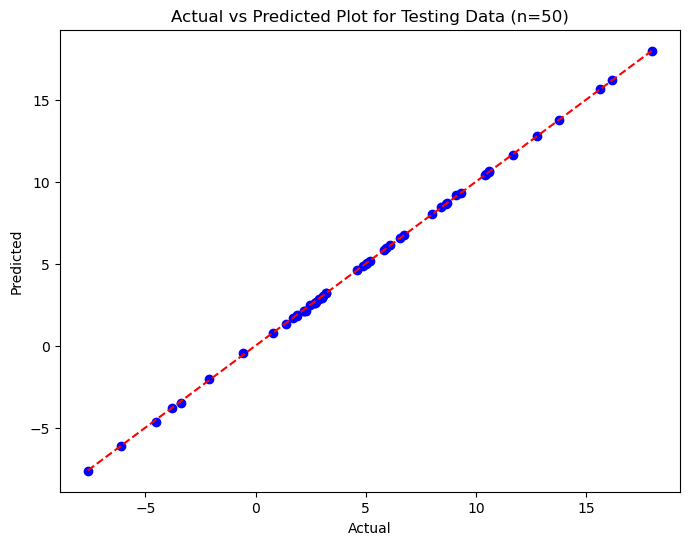

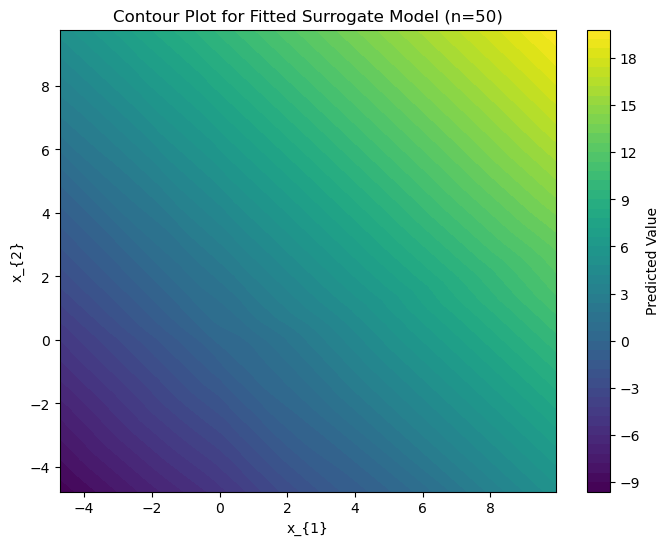

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from pyDOE import lhs



# Sample sizes
sample_sizes = [20, 50]

for n in sample_sizes:
    # Generating training and testing input using pyDOE
    training_input_lhs = lhs(2, samples=n)
    testing_input_lhs = lhs(2, samples=n)

    # Transforming testing and training input
    training_input_bar = 15 * training_input_lhs - 5
    testing_input_bar = 15 * testing_input_lhs - 5

    # Plotting the testing and training samples
    plt.figure(figsize=(8, 6))
    plt.plot(testing_input_bar[:, 0], testing_input_bar[:, 1], 'ro', label='Sample for Testing')
    plt.plot(training_input_bar[:, 0], training_input_bar[:, 1], 'b*', label='Sample for Training')
    plt.legend(loc='upper left')
    plt.xlabel('x_{1}')
    plt.ylabel('x_{2}')
    plt.title(f'Sample Plot for sample number n={n}')
    plt.show()

    # Example function to calculate y values (sum of input data)
    def example_function(input_data):
        return np.sum(input_data, axis=1)

    # Calculating y values
    training_y = example_function(training_input_bar)
    testing_y = example_function(testing_input_bar)

    # PyTorch model
    X_train = torch.tensor(training_input_bar, dtype=torch.float32)
    y_train = torch.tensor(training_y, dtype=torch.float32).view(-1, 1)

    class FeedForwardNN(nn.Module):
        def __init__(self):
            super(FeedForwardNN, self).__init__()
            self.hidden1 = nn.Linear(2, 20)
            self.hidden2 = nn.Linear(20, 20)
            self.output = nn.Linear(20, 1)

        def forward(self, x):
            x = torch.relu(self.hidden1(x))
            x = torch.relu(self.hidden2(x))
            x = self.output(x)
            return x

    # Neural network instance
    neural_network = FeedForwardNN()

    # Loss and optimizer
    loss_function = nn.MSELoss()
    optimizer = optim.Adam(neural_network.parameters(), lr=0.01)

    # Training loop
    epochs = 1000
    losses = []
    for epoch in range(epochs):
        predictions = neural_network(X_train)
        loss = loss_function(predictions, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    # Plotting the loss over epochs
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training Loss for sample number n={n}')
    plt.show()

    # Predictions for training and testing data
    training_predictions = neural_network(torch.tensor(training_input_bar, dtype=torch.float32)).detach().numpy()
    testing_predictions = neural_network(torch.tensor(testing_input_bar, dtype=torch.float32)).detach().numpy()

    # Actual vs. Predicted plot for training data
    plt.figure(figsize=(8, 6))
    plt.plot(training_y, training_predictions, 'ro')
    plt.plot([training_y.min(), training_y.max()], [training_y.min(), training_y.max()], 'b--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted Plot for Training Data (n={n})')
    plt.show()

    # Actual vs. Predicted plot for testing data
    plt.figure(figsize=(8, 6))
    plt.plot(testing_y, testing_predictions, 'bo')
    plt.plot([testing_y.min(), testing_y.max()], [testing_y.min(), testing_y.max()], 'r--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted Plot for Testing Data (n={n})')
    plt.show()

    # Contour plot for the fitted surrogate model
    x1_range = np.linspace(training_input_bar[:, 0].min(), training_input_bar[:, 0].max(), 100)
    x2_range = np.linspace(training_input_bar[:, 1].min(), training_input_bar[:, 1].max(), 100)
    x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
    input_grid = np.c_[x1_grid.ravel(), x2_grid.ravel()]
    contour_predictions = neural_network(torch.tensor(input_grid, dtype=torch.float32)).detach().numpy()
    contour_grid = contour_predictions.reshape(x1_grid.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(x1_grid, x2_grid, contour_grid, levels=50, cmap='viridis')
    plt.colorbar(label='Predicted Value')
    plt.xlabel('x_{1}')
    plt.ylabel('x_{2}')
    plt.title(f'Contour Plot for Fitted Surrogate Model (n={n})')
    plt.show()

   


